#### In both problems, instead of picking the last 55K/first 5K records for train/validation sets, define the train/validation split through the  function train_test_split(X, y, random_state=num4). Set the random seed num4 to the last 4 digits of your student ID. 

In [ ]:
import sys
import numpy as np
import pandas as pd
import os

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, models
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
import keras.backend as K

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import matplotlib.pyplot as plt
%matplotlib inline

#### 10. Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the error, and finding the point where the error shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

In [ ]:
# Load mnist dataset
digits = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = digits.load_data()

In [ ]:
print("X_train_full.shape:", X_train_full.shape)
print("X_test.shape:", X_test.shape)
print("y_train_full.shape:", y_train_full.shape)
print("y_test.shape:", y_test.shape)

X_train_full.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)
y_train_full.shape: (60000,)
y_test.shape: (10000,)


In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
# Each pixel intensity is represented as a byte (0 to 255)
pd.set_option('display.max_columns', 200)
pd.DataFrame(X_train_full[0,:,:]) 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


In [ ]:
# set random seed
num4 = 8726

# scale input features, convert image pixals from integars to floats
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# split train/vaild by train_test_split, using random seed
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=num4)

In [ ]:
# The validation set contains 15,000 images, and the test set contains 10,000 images:
print("X_train.shape:", X_train.shape)
print("X_valid.shape:", X_valid.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (45000, 28, 28)
X_valid.shape: (15000, 28, 28)
X_test.shape: (10000, 28, 28)
y_train.shape: (45000,)
y_valid.shape: (15000,)
y_test.shape: (10000,)


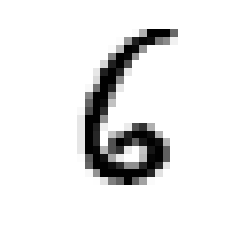

In [ ]:
# With MNIST, when the label is equal to 5, it means that the image represents the handwritten digit 5. 
# You can plot the image using Matplotlib's `imshow()` function, with a `'binary'` color map:
plt.imshow(X_valid[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
# The labels are the class IDs (represented as uint8), from 0 to 9
y_train

array([8, 3, 8, ..., 2, 2, 6], dtype=uint8)

In [ ]:
# Corresponding class names:
class_names = ["0", "1", "2", "3", "4",
               "5", "6", "7", "8", "9"]

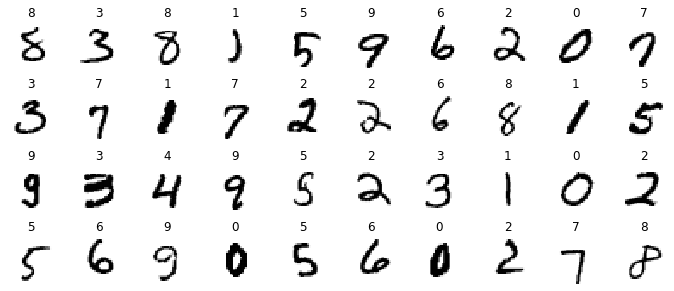

In [ ]:
# Sample of the images in the dataset:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# Start building the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# reset session 
# clear the graph from preivous to make a new one
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# complie model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.Adam(lr=1e-3),
             metrics=['accuracy'])

In [ ]:
# tensorboard() callback
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-_%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
# train model
history = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Epoch 1/5
1407/1407 [==============================] - 7s 4ms/step - loss: 0.3968 - accuracy: 0.8839 - val_loss: 0.1273 - val_accuracy: 0.9617
Epoch 2/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0969 - accuracy: 0.9701 - val_loss: 0.0949 - val_accuracy: 0.9710
Epoch 3/5
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0619 - accuracy: 0.9809 - val_loss: 0.0904 - val_accuracy: 0.9719
Epoch 4/5
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0436 - accuracy: 0.9855 - val_loss: 0.1011 - val_accuracy: 0.9709
Epoch 5/5
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0366 - accuracy: 0.9883 - val_loss: 0.0840 - val_accuracy: 0.9759


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2.5)
plt.show()

In [ ]:
# view the learning curves
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

We can see that as our model's accuracy steadily increases its loss steadily decreases.

In [ ]:
# Test, callback best model
model.evaluate(X_test, y_test, callbacks=[tensorboard_cb])

313/313 [==============================] - 1s 3ms/step - loss: 0.0723 - accuracy: 0.9777


[0.07227689772844315, 0.9776999950408936]

We achive a test accuracy of 97.7%

In [ ]:
# using model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

/Users/isabellachittumuri/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 2, 1])

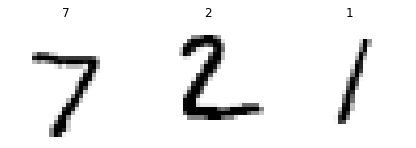

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## 8. Practice training a deep neural network on the CIFAR10 image dataset: 

   #### a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.

In [ ]:
# reset session
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# build DNN w/ 20 hidden layers of 100 neurons
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
# for loop to repeat dense layer 20 times
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))

#### b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000) for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters. 

In [ ]:
# load CIFAR10 dataset
cifar10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

In [ ]:
# split train/vaild by train_test_split, using random seed
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=8726)

# add the output layer to model in part a
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
print("X_train.shape:", X_train.shape)
print("X_valid.shape:", X_valid.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_valid.shape:", y_valid.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (37500, 32, 32, 3)
X_valid.shape: (12500, 32, 32, 3)
X_test.shape: (10000, 32, 32, 3)
y_train.shape: (37500, 1)
y_valid.shape: (12500, 1)
y_test.shape: (10000, 1)


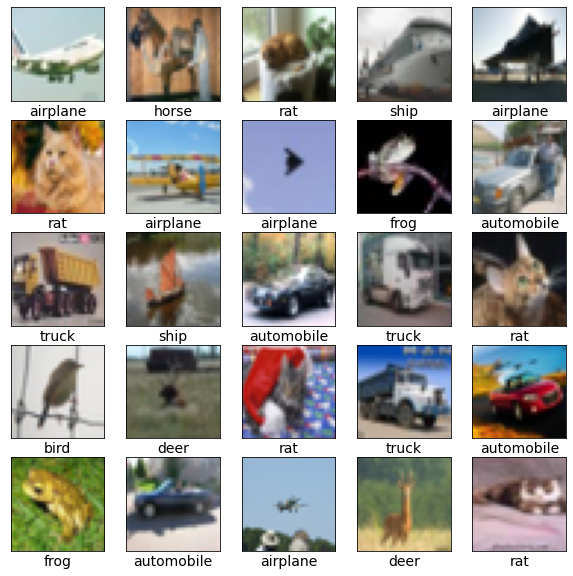

In [ ]:
# corresponding class names
class_names = ["airplane", "automobile", "bird", "rat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Sample of the images in the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# categoical labels to binary labels, one-hot encoded 
from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)
y_test = to_categorical(y_test, 10)

# complie model
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1e-3),
              metrics=["accuracy"]) 

# train model
history = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_valid, y_valid),
                   callbacks=tensorboard_cb)

Epoch 1/5
1172/1172 [==============================] - 23s 16ms/step - loss: 11.6833 - accuracy: 0.1703 - val_loss: 2.0832 - val_accuracy: 0.2209
Epoch 2/5
1172/1172 [==============================] - 24s 20ms/step - loss: 1.9707 - accuracy: 0.2714 - val_loss: 1.8625 - val_accuracy: 0.3157
Epoch 3/5
1172/1172 [==============================] - 27s 23ms/step - loss: 1.8917 - accuracy: 0.3047 - val_loss: 1.8385 - val_accuracy: 0.3340
Epoch 4/5
1172/1172 [==============================] - 30s 25ms/step - loss: 1.8577 - accuracy: 0.3218 - val_loss: 1.9117 - val_accuracy: 0.2889
Epoch 5/5
1172/1172 [==============================] - 28s 24ms/step - loss: 1.8407 - accuracy: 0.3241 - val_loss: 1.8639 - val_accuracy: 0.3250


In [ ]:
# clear my_logs
# %rm -rf ./my_logs/
# from keras.backend import clear_session
# Before instantiating a tf.data.Dataset obj & before model creation, call:
#clear_session()

# tensorboard() callback
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-_%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# view the learning curves
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 827), started 0:06:26 ago. (Use '!kill 827' to kill it.)

In [ ]:
# Test, callback best model
model.evaluate(X_test, y_test, callbacks=[tensorboard_cb])

313/313 [==============================] - 1s 4ms/step - loss: 1.8485 - accuracy: 0.3293


[1.848456859588623, 0.3292999863624573]

#### c. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [ ]:
# reset session
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# batch normalization model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [ ]:
# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1e-3),
              metrics=["accuracy"])

# tensorboard() callback
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-_%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# train model
history = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_valid, y_valid),
                   callbacks=tensorboard_cb)

Epoch 1/5
1172/1172 [==============================] - 75s 50ms/step - loss: 2.0849 - accuracy: 0.2515 - val_loss: 2.0258 - val_accuracy: 0.2671
Epoch 2/5
1172/1172 [==============================] - 41s 35ms/step - loss: 1.7985 - accuracy: 0.3550 - val_loss: 1.9613 - val_accuracy: 0.3037
Epoch 3/5
1172/1172 [==============================] - 38s 32ms/step - loss: 1.7244 - accuracy: 0.3858 - val_loss: 1.8452 - val_accuracy: 0.3818
Epoch 4/5
1172/1172 [==============================] - 36s 31ms/step - loss: 1.6678 - accuracy: 0.4068 - val_loss: 1.7128 - val_accuracy: 0.4128
Epoch 5/5
1172/1172 [==============================] - 39s 33ms/step - loss: 1.6407 - accuracy: 0.4219 - val_loss: 1.7667 - val_accuracy: 0.3752


In [ ]:
# view the learning curves
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 827), started 0:10:52 ago. (Use '!kill 827' to kill it.)

In [ ]:
# Test, callback best model
model.evaluate(X_test, y_test, callbacks=[tensorboard_cb])

313/313 [==============================] - 4s 13ms/step - loss: 1.6955 - accuracy: 0.3909


[1.695520281791687, 0.39089998602867126]

#### d. Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self- normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [ ]:
# reset session
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# SELU model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(100, activation="selu",
                             kernel_initializer="lecun_normal"))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [ ]:
# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1e-3),
              metrics=["accuracy"])

# tensorboard() callback
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-_%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# scale/normalize the inputs
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# train model
history = model.fit(X_train_scaled, y_train, epochs=5,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=tensorboard_cb)

Epoch 1/5
1172/1172 [==============================] - 63s 38ms/step - loss: 2.1257 - accuracy: 0.2348 - val_loss: 1.9442 - val_accuracy: 0.3060
Epoch 2/5
1172/1172 [==============================] - 45s 39ms/step - loss: 1.8279 - accuracy: 0.3445 - val_loss: 1.8205 - val_accuracy: 0.3373
Epoch 3/5
1172/1172 [==============================] - 39s 33ms/step - loss: 1.7193 - accuracy: 0.3862 - val_loss: 1.7303 - val_accuracy: 0.3958
Epoch 4/5
1172/1172 [==============================] - 28s 24ms/step - loss: 1.6480 - accuracy: 0.4083 - val_loss: 1.6537 - val_accuracy: 0.3966
Epoch 5/5
1172/1172 [==============================] - 23s 20ms/step - loss: 1.5985 - accuracy: 0.4284 - val_loss: 1.6598 - val_accuracy: 0.4198


In [ ]:
# view the learning curves
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 827), started 0:16:07 ago. (Use '!kill 827' to kill it.)

In [ ]:
# Test, callback best model
model.evaluate(X_test, y_test, callbacks=[tensorboard_cb])

313/313 [==============================] - 3s 6ms/step - loss: 34.4145 - accuracy: 0.2100


[34.41451644897461, 0.20999999344348907]

#### e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.

In [ ]:
# reset session
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# alpha dropout model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [ ]:
# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1e-3),
              metrics=["accuracy"])

# tensorboard() callback
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-_%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

# train model
history = model.fit(X_train_scaled, y_train, epochs=5,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=tensorboard_cb)

Epoch 1/5
1172/1172 [==============================] - 55s 38ms/step - loss: 2.1333 - accuracy: 0.2446 - val_loss: 1.8860 - val_accuracy: 0.3212
Epoch 2/5
1172/1172 [==============================] - 33s 28ms/step - loss: 1.8053 - accuracy: 0.3533 - val_loss: 1.7442 - val_accuracy: 0.3782
Epoch 3/5
1172/1172 [==============================] - 25s 21ms/step - loss: 1.7275 - accuracy: 0.3877 - val_loss: 1.7414 - val_accuracy: 0.3828
Epoch 4/5
1172/1172 [==============================] - 26s 22ms/step - loss: 1.6667 - accuracy: 0.4077 - val_loss: 1.7366 - val_accuracy: 0.3857
Epoch 5/5
1172/1172 [==============================] - 19s 16ms/step - loss: 1.6228 - accuracy: 0.4264 - val_loss: 1.6757 - val_accuracy: 0.4235


In [ ]:
# reset session
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

# Call MCDropout
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)
    
# MC Dropout model    
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
def dropout_predict_probas(model, X, n_samples=10):
    Y_probas = [model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def dropout_predict_classes(model, X, n_samples=10):
    Y_probas = dropout_predict_probas(model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [ ]:
y_pred = dropout_predict_classes(model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.14264

#### f. Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

# alpha dropout model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

# compile model
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Nadam(lr=1e-3),
              metrics=["accuracy"])

293/293 [==============================] - 15s 35ms/step - loss: 10091274993.3559 - accuracy: 0.1529


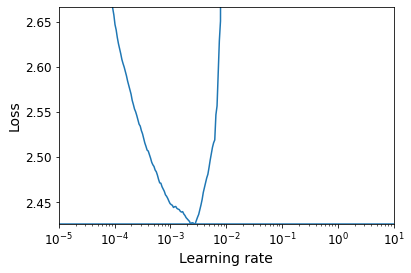

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
n_epochs = 5 #25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/5
293/293 [==============================] - 18s 60ms/step - loss: 2.0139 - accuracy: 0.2818 - val_loss: 2.1255 - val_accuracy: 0.2529
Epoch 2/5
293/293 [==============================] - 10s 33ms/step - loss: 1.9700 - accuracy: 0.2889 - val_loss: 2.5415 - val_accuracy: 0.2293
Epoch 3/5
293/293 [==============================] - 11s 37ms/step - loss: nan - accuracy: 0.1177 - val_loss: nan - val_accuracy: 0.1031
Epoch 4/5
293/293 [==============================] - 8s 28ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.1031
Epoch 5/5
293/293 [==============================] - 8s 29ms/step - loss: nan - accuracy: 0.0990 - val_loss: nan - val_accuracy: 0.1031
